# Predict The Flight Ticket Price Hackathon
https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#Imporing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline

In [2]:
# loading the training and test data
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_Set.xlsx')

In [3]:
# looking at the starting 5 training data
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape # Getting the shape of training data

(10683, 11)

In [5]:
train_df.info()  # Getting the information of training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [6]:
test_df.shape # Getting the shape of test data

(2671, 10)

In [7]:
combined_df=train_df.append(test_df,sort=False) # combining the train and test data in one df later will separate after feature engineering

In [8]:
combined_df.tail() # looking at the training data from end

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [9]:
combined_df['Route'].isnull().value_counts() # getting the null value count for feature Route

False    13353
True         1
Name: Route, dtype: int64

In [10]:
combined_df.isna() # checking the nan field in combined data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2666,False,False,False,False,False,False,False,False,False,False,True
2667,False,False,False,False,False,False,False,False,False,False,True
2668,False,False,False,False,False,False,False,False,False,False,True
2669,False,False,False,False,False,False,False,False,False,False,True


In [11]:
# separting the feature Date _of_Journey into three different fetures Journey_Date, Journey_Month,  Journey_Year
combined_df['Journey_Date']=combined_df['Date_of_Journey'].str.split('/').str[0]
combined_df['Journey_Month']=combined_df['Date_of_Journey'].str.split('/').str[1]
combined_df['Journey_Year']=combined_df['Date_of_Journey'].str.split('/').str[2]

In [12]:
combined_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [13]:
# getting the data type of all features
combined_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Journey_Date        object
Journey_Month       object
Journey_Year        object
dtype: object

In [14]:
# converting the data type of newly created feature as int
combined_df['Journey_Date']=combined_df['Journey_Date'].astype(int)
combined_df['Journey_Month']=combined_df['Journey_Month'].astype(int)
combined_df['Journey_Year']=combined_df['Journey_Year'].astype(int)

In [15]:
# dropping the feature Date_of_Journey as already 3 fetatures have been generted from this
combined_df=combined_df.drop(['Date_of_Journey'],axis=1)


In [16]:
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
# getting the data type of all features
combined_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Journey_Date         int32
Journey_Month        int32
Journey_Year         int32
dtype: object

In [18]:
# separting the Time value from feature Arrival_Time 
combined_df['Arrival_Time']=combined_df['Arrival_Time'].str.split(' ').str[0]

In [19]:
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [20]:
# checking the null value
combined_df.isnull()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,False,False,False,False,False,False,False,False,False,True,False,False,False
2667,False,False,False,False,False,False,False,False,False,True,False,False,False
2668,False,False,False,False,False,False,False,False,False,True,False,False,False
2669,False,False,False,False,False,False,False,False,False,True,False,False,False


In [21]:
# getting the records which contain NaN value for feature Total_Stops
combined_df[combined_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [22]:
# filling the records with NaN value as 1 stops as from other record seems Delhi to Cochin flight usually take 1 stops
combined_df['Total_Stops']=combined_df['Total_Stops'].fillna('1 stop')

In [23]:
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [24]:
# replacing non stop value to 0 stop in Total_Stops feature
combined_df['Total_Stops']=combined_df['Total_Stops'].replace('non-stop','0 stop')

In [25]:
# getting numerical part from feature Total_Stops 
combined_df['Total_Stops']=combined_df['Total_Stops'].str.split(' ').str[0]

In [26]:
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [27]:
combined_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Journey_Date         int32
Journey_Month        int32
Journey_Year         int32
dtype: object

In [28]:
# converting data type as int for feature Total_Stops 
combined_df['Total_Stops']=combined_df['Total_Stops'].astype(int)

In [29]:
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [30]:
# extracing Arrival_Hour and Arrival_Minute from feature Arrival_Time
combined_df['Arrival_Hour']=combined_df['Arrival_Time'].str.split(':').str[0]
combined_df['Arrival_Minute']=combined_df['Arrival_Time'].str.split(':').str[1]


In [31]:
# converting data type as int for feature Arrival_Hour,  Arrival_Minute
combined_df['Arrival_Hour']=combined_df['Arrival_Hour'].astype(int)
combined_df['Arrival_Minute']=combined_df['Arrival_Minute'].astype(int)
# dropping feature Arrival_Time from dataset as two features already extracted from this
combined_df=combined_df.drop('Arrival_Time',axis=1)

In [32]:
combined_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,0,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


In [33]:
# extracing Departure_Hour and Departure_Minute from feature Dep_Time and converting them to as Int 
combined_df['Departure_Hour']=combined_df['Dep_Time'].str.split(':').str[0]
combined_df['Departure_Minute']=combined_df['Dep_Time'].str.split(':').str[1]
combined_df['Departure_Hour']=combined_df['Departure_Hour'].astype(int)
combined_df['Departure_Minute']=combined_df['Departure_Minute'].astype(int)
# dropping feature Dep_Time from dataset
combined_df=combined_df.drop('Dep_Time',axis=1)


In [34]:
combined_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [35]:
# extracing Route_1, Route_2, Route_3, Route_4 and Route_5 from feature Route
combined_df['Route_1']=combined_df['Route'].str.split('→ ').str[0]
combined_df['Route_2']=combined_df['Route'].str.split('→ ').str[1]
combined_df['Route_3']=combined_df['Route'].str.split('→ ').str[2]
combined_df['Route_4']=combined_df['Route'].str.split('→ ').str[3]
combined_df['Route_5']=combined_df['Route'].str.split('→ ').str[4]

In [36]:
combined_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [37]:
# dropping feature Route from dataset
combined_df.drop(['Route'],axis=1,inplace=True)

In [38]:
combined_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [39]:
# extracing Duration_Hour, Duration_Minute from feature Duration
combined_df['Duration_Hour']=combined_df['Duration'].str.split('h ').str[0]
combined_df['Duration_Minute']=combined_df['Duration'].str.split('h ').str[1]
# dropping  feature Duration from dataset
combined_df.drop(['Duration'],axis=1,inplace=True)

In [40]:
combined_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,2,50m
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,7,25m
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN,19h,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN,5,25m
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN,4,45m


In [41]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
Airline             13354 non-null object
Source              13354 non-null object
Destination         13354 non-null object
Total_Stops         13354 non-null int32
Additional_Info     13354 non-null object
Price               10683 non-null float64
Journey_Date        13354 non-null int32
Journey_Month       13354 non-null int32
Journey_Year        13354 non-null int32
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Departure_Hour      13354 non-null int32
Departure_Minute    13354 non-null int32
Route_1             13353 non-null object
Route_2             13353 non-null object
Route_3             9013 non-null object
Route_4             1957 non-null object
Route_5             58 non-null object
Duration_Hour       13354 non-null object
Duration_Minute     12068 non-null object
dtypes: float64(1), int32(8), object(11)
memory usage: 1.2+ MB


In [42]:
# extracing hour from feature Duration_Hour
combined_df['Duration_Hour']=combined_df['Duration_Hour'].str.split('h').str[0]
# extracing Minutes from feature Duration_Minute
combined_df['Duration_Minute']=combined_df['Duration_Minute'].str.split('m').str[0]

In [43]:
combined_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN,19,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN,4,45


In [44]:
# getting the sum of null values for all features
combined_df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                2671
Journey_Date            0
Journey_Month           0
Journey_Year            0
Arrival_Hour            0
Arrival_Minute          0
Departure_Hour          0
Departure_Minute        0
Route_1                 1
Route_2                 1
Route_3              4341
Route_4             11397
Route_5             13296
Duration_Hour           0
Duration_Minute      1286
dtype: int64

In [45]:
# filling nan value of feature Duration_Minute with 0
combined_df['Duration_Minute']=combined_df['Duration_Minute'].fillna('0')

In [46]:
# splitting Duration_Hour with hour parts
combined_df['Duration_Hour']=combined_df['Duration_Hour'].str.split('m').str[0]


In [47]:
combined_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN,4,45


In [48]:
# converting datatype as in for feature Duration_Hour, Duration_Minute 
combined_df['Duration_Hour']=combined_df['Duration_Hour'].astype(int)
combined_df['Duration_Minute']=combined_df['Duration_Minute'].astype(int)

In [49]:
#combining Duration_Hour, Duration_Minute into Duration feature and dropping Duration_Hour, Duration_Minute
combined_df['Duration']=combined_df['Duration_Hour']*60+combined_df['Duration_Minute']
combined_df.drop('Duration_Hour',axis=1,inplace=True)
combined_df.drop('Duration_Minute',axis=1,inplace=True)

In [50]:
combined_df.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN,445
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN,285


In [51]:
# filling nan value with None value
combined_df['Route_1']=combined_df['Route_1'].fillna('None')
combined_df['Route_2']=combined_df['Route_2'].fillna('None')
combined_df['Route_3']=combined_df['Route_3'].fillna('None')
combined_df['Route_4']=combined_df['Route_4'].fillna('None')
combined_df['Route_5']=combined_df['Route_5'].fillna('None')

In [52]:
combined_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,170
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,445
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,325
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,285


In [53]:
#checking count of null values in all features
combined_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Journey_Date           0
Journey_Month          0
Journey_Year           0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
Duration               0
dtype: int64

In [54]:
# converting categorical features using LabelEncoder to numerical feature
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
combined_df['Airline']=encoder.fit_transform(combined_df['Airline'])
combined_df['Source']=encoder.fit_transform(combined_df['Source'])
combined_df['Destination']=encoder.fit_transform(combined_df['Destination'])
combined_df['Additional_Info']=encoder.fit_transform(combined_df['Additional_Info'])
combined_df['Route_1']=encoder.fit_transform(combined_df['Route_1'])
combined_df['Route_2']=encoder.fit_transform(combined_df['Route_2'])
combined_df['Route_3']=encoder.fit_transform(combined_df['Route_3'])
combined_df['Route_4']=encoder.fit_transform(combined_df['Route_4'])
combined_df['Route_5']=encoder.fit_transform(combined_df['Route_5'])


In [55]:
combined_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,24,12,4,170
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,4,445
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,4,1140
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,12,4,325
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,12,4,285


In [56]:
train_df.shape

(10683, 11)

In [57]:
#splitting train and test part as given in problem after feature engineering
train_df=combined_df[0:10683]
test_df=combined_df[10684:]

In [58]:
train_df.head()
test_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration
1,3,3,0,1,8,NaN,12,5,2019,10,20,6,20,2,33,3,12,4,240
2,4,2,1,1,5,NaN,21,5,2019,19,0,19,15,3,7,6,12,4,1425
3,6,2,1,1,8,NaN,21,5,2019,21,0,8,0,3,7,6,12,4,780
4,0,0,2,0,8,NaN,24,6,2019,2,45,23,55,0,13,24,12,4,170
5,4,2,1,1,5,NaN,12,6,2019,12,35,18,15,3,7,6,12,4,1100


In [59]:
# splitting train data into dependent and independent features
X=train_df.drop('Price',axis=1)
y=train_df['Price']

In [60]:
X.head()
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [61]:
#dropping independent feature from test data
test_df=test_df.drop('Price',axis=1)

In [62]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration
1,3,3,0,1,8,12,5,2019,10,20,6,20,2,33,3,12,4,240
2,4,2,1,1,5,21,5,2019,19,0,19,15,3,7,6,12,4,1425
3,6,2,1,1,8,21,5,2019,21,0,8,0,3,7,6,12,4,780
4,0,0,2,0,8,24,6,2019,2,45,23,55,0,13,24,12,4,170
5,4,2,1,1,5,12,6,2019,12,35,18,15,3,7,6,12,4,1100


In [63]:
#splitting the train data in train(70 %) and test data(30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) #random_state is given any value to reprodue the results

In [64]:
# Importing lasso to regularize the fetures and SelectFromModel to select the features
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [65]:
# fetaure selection using SelectFromModel and Lasso method
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)#fitting the data

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [66]:
model.get_support()# to get the features are selected or not

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [67]:
# to get selected features
selected_features=X_train.columns[(model.get_support())]

In [68]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Journey_Date', 'Journey_Month', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Duration'],
      dtype='object')

In [69]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [70]:
X_train.shape

(7478, 17)

In [71]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [72]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [73]:
from sklearn.ensemble import RandomForestRegressor # imporing random Forest Regressor
rf_model = RandomForestRegressor() # instantiating the random Forest Regressor

In [74]:
# hypertuning of model to get optimal parameters for model
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring=
                               'neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   8.5s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   9.9s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  10.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  10.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  10.0s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  10.0s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  21.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  21.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  21.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  21.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  22.2s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=  13.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total= 4.4min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.6s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  15.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  15.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  15.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   8.7s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   8.5s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.2s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   8.5s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 47.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [76]:
y_pred=rf_random.predict(X_test)#prediction of price using model for test data

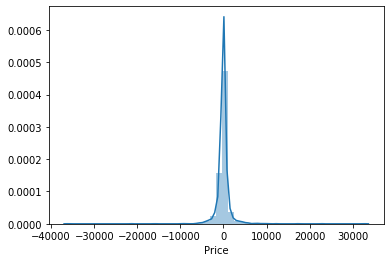

In [77]:
import seaborn as sns
sns.distplot(y_test-y_pred)# plotting the difference of price of test data and predicted data

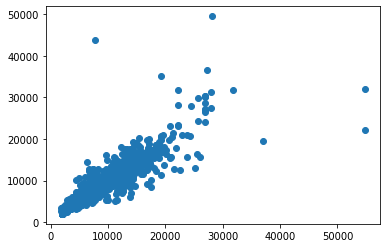

In [78]:
plt.scatter(y_test,y_pred) # plotting scatter matrix for pricted price and test data